## Simple NN trained on the MNIST dataset for image classification 

01- have fully connected

02- cnn

they have different achitecture

In this notebook we are going to get familiar with using PyTorch, a deep learning library, to train a simple neural network. The network will be trained on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which contains small images of handwritten numerical digits. By the end of this training, the model should be able to accurately classify images with numerical digits.

Training a network on the MNIST dataset has become the 'hello world' of machine learning. 

Once you run this code, you can compare it with the code in the notebook `02`. 

First let's do some imports:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets 
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'torch'

##### Define our hyperparameters

Now let's define our hyperparameters. Add a comment for each variable. What are these variables?

In [2]:
#
device = 'cpu'
#
num_epochs = 10
#
num_classes = 10
# 
batch_size = 100
#
learn_rate = 0.001
#
data_path = './data'

##### Image transformations

torchvision.transforms.ToTensor converts a python image (PIL) or numpy.ndarray to tensor.

torchvision.transforms.Normalize(mean, std, inplace=False) normalizes a tensor image with mean and standard deviation.

Look in [here](https://pytorch.org/vision/0.9/transforms.html) for more information.

tranform our inputs into tensor
our inputs- a form of images

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

##### Create our train and test datasets

Torchvision provides many built-in datasets in the torchvision.datasets module. MNIST is one of them. You can find more [here](https://pytorch.org/vision/stable/datasets.html).

MNIST is composed of a train set (60,000 images) and a test set (10,000 images). Only the train set will be used for the training. The test set is meant to be used after the training is completed, to see how the model performs on unseen data.

we use MNIST dataset here

In [4]:
mnist_trainset = datasets.MNIST(root=data_path, train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root=data_path, train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:01<00:00, 6374682.52it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21504650.07it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3142848.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4693404.48it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



EXPLORE

What are these tensors? What is the difference between `data` and `targets`?

print to explore, the shape? other things?

In [5]:
#
print(mnist_trainset.data.shape, mnist_trainset.targets.shape)
#
print(mnist_testset.data.shape, mnist_testset.targets.shape) 

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


##### Visualise a sample image along with its respective label

In [6]:
img_num = 1000 # change this number to have a glimpse into another item of the trainset

# using numpy
# turn the tensor into a numpy array
sample_np = mnist_trainset.data[img_num].numpy() 
# add a wide linewidth to prevent wrapping
np.set_printoptions(linewidth=150) 
print(f"Label: {mnist_trainset.targets[img_num]}")
print()
print(sample_np)

Label: 0

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255 251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232 254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33 200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   1   0 

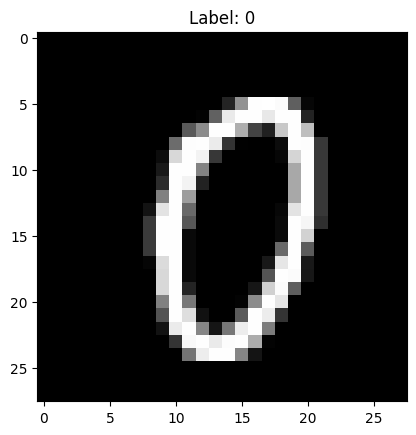

In [7]:
# using matplotlib
# plotting for one image
plt.figure()
plt.title(f"Label: {mnist_trainset.targets[img_num]}")
plt.imshow(mnist_trainset.data[img_num], cmap='gray')
plt.show()

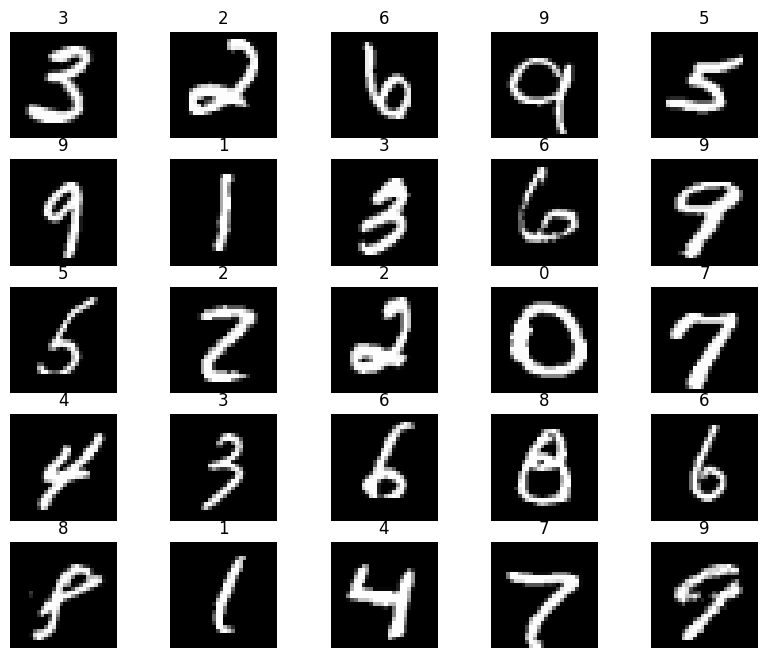

In [8]:
# plotting for multiple images, randomly selected
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    # generate a random index between 0 and len(mnist_trainset)-1, inclusive
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    # retrieve the image and the respective label for that index
    img, label = mnist_trainset[sample_idx]
    # create the grid of subplots within the bigger plot
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    # squeeze() removes all dimensions with size 1
    # try running the cell without squeezing the image and observe the returned error 
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

##### Create our train and test dataloaders

A DataLoader wraps an iterable around the Dataset, allowing us to iterate over batches of data when training. The DataLoader can shuffle the data at the beginning of each epoch if the shuffle parameter is set to True. Shuffling helps in randomizing the order of data samples and prevents the model from learning any order-specific patterns.

loading our data

In [ ]:
train_loader = DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)# organize these data in the batch by this size
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)

##### Define our simple fully connected NN

In [ ]:
class ClassificationNetwork(nn.Module):
    def __init__(self):
        #
        super(ClassificationNetwork,self).__init__()
        #
        self.fc1 = nn.Linear(28*28, 128) #flatten all our data?????
        #
        self.fc2 = nn.Linear(128, 64) 
        #
        self.fc3 = nn.Linear(64, num_classes)#highest probabilities- classify by this way 
        
    def forward(self, x):
        #
        x = torch.flatten(x, 1)
        #
        x = self.fc1(x)
        #
        x = F.relu(x)
        #
        x = self.fc2(x)
        #
        x = F.relu(x)
        #
        x = self.fc3(x)
        #
        return x

##### Setup core training objects

Look into available loss functions [here](https://pytorch.org/docs/stable/nn.html#loss-functions).

Look into available optimizers [here](https://pytorch.org/docs/stable/optim.html)

In [ ]:
model = ClassificationNetwork()#our model has this architecture
model.to(device)

# selecting cross entropy as the loss function for our classification
criterion = nn.CrossEntropyLoss() #define our loss function- visit the http to see

# selecting Adam as our optimization algorithm based on which the parameters, i.e. weight, will be updated
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

# print model architecture
model.eval()

##### Training

the training cycle

In [ ]:
train_losses = []

for epoch in range(num_epochs): 
    train_loss = 0.0
    
    # training loop
    for batch_idx, (data, target) in enumerate(train_loader):
        # get data
        inputs = data.to(device)
        labels = target.to(device)
        
        # zero the gradients
        optimizer.zero_grad()
        # forward pass
        predictions = model(inputs)
        # compute the loss
        loss = criterion(predictions, labels)
        # backpropagate
        loss.backward()
        # update the parameters, i.e. weights
        optimizer.step()

        # save statistics to plot later
        train_loss += loss.item()
    
    # normalise cumulative losses to dataset size
    train_loss = train_loss / len(train_loader)
    # added cumulative losses to list to plot later
    train_losses.append(train_loss)
    
    print(f'Epoch {epoch + 1}, train loss: {train_loss:.3f}')

##### Plot loss values as stored during training

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Train loss")
plt.plot(train_losses,label="train")
plt.xlabel("epochs")
plt.ylabel("cumulative loss")
plt.legend()
plt.show()

##### Test model on the MNIST test dataset
test on new data

A process also known as Inference:

In [ ]:
correct = 0
total = 0
# disabling gradient computation since there is no need to update any parameters
with torch.no_grad():
    # iterate over batches in the test_loader
    for data, target in test_loader:
        # forward pass
        predictions = model(data)
        # get the index of the maximum predicted value (predicted class)
        # the underscore is a variable to be ignored - a placeholder for the maximum values
        _, predicted = torch.max(predictions.data, 1)
        # update the total number of samples by adding the current batch
        total += target.size(0)
        # update the count of correct predictions by summing the correct predictions in the current batch
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy}\n Number of Correct Predictions: {correct} out of {total}' )

##### Visualise some predictions based on the MNIST test dataset

we got our grams to show our predictions

In [ ]:
# disabling gradient computation since there is no need to update any parameters
with torch.no_grad():
    num_images = 5
    figure = plt.figure(figsize=(15, 5))

    for i in range(1, num_images + 1):
        sample_idx = torch.randint(len(mnist_testset), size=(1,)).item()
        img, label = mnist_testset[sample_idx]
        output = model(img)
        _, predicted = torch.max(output.data, 1)

        figure.add_subplot(1, num_images, i)
        plt.title(f"Predicted: {predicted.item()}\nActual: {label}")
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")

    plt.show()

##### Visualise some predictions based on external inputs

In [ ]:
from PIL import Image

img_path = './data/sample-numbers/seven-rgb.jpg'

# function to preprocess the image
def preprocess_image(image_path):
    # convert the image to black and white and transform it to match the required input format for the model
    img = Image.open(image_path).convert("L")
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    img_tensor = transform(img)
    # img is an array for the plot and img_tensor is a tensor to pass through the model
    return img, img_tensor

# preprocess the image
image, tensor_image = preprocess_image(img_path)

with torch.no_grad():
    # forward pass
    prediction = model(tensor_image)
    # get the predicted class
    _, predicted_class = torch.max(prediction, 1)

plt.imshow(image, cmap='gray')
plt.title(f'Predicted Class: {predicted_class.item()}')
plt.axis('off')
plt.show()

##### Save the model

will be save inthe 'model' folder

In [ ]:
torch.save(model.state_dict(), './models/mnist_model.pt')

### Tasks to do in-class and further explore at home

**Task 1:** Run all the cells in this code to train a simple NN on the MNIST dataset.

**Task 2:** Go through the notebook, cell by cell, and try to understand what each cell does, even if you do not understand each one of the commands seperately. The important thing is to roughly understand the whole process of the training. Training a NN in PyTorch is a great opportunity to see all the theory of training in practice.

**Task 3:** Go through the notebook once again and add comments wherever you see a `#`. Consult [the pytorch documentation page](https://pytorch.org/docs/stable/index.html) for anything you are unsure about. 

**Task 4:** Add other images of handwritten digits in the data folder and test your model on those within the cell `Visualise some predictions based on external inputs`. You can add images you download from the internet, or you could get more experimental and e.g. create handwritten digits on paper and load them here, or create b-w digits in p5 or other environments and test how the model performs on all of these cases. Test the model's limits.